### 📘 Clasificación con K-Nearest Neighbors (KNN)

Este notebook muestra cómo aplicar el algoritmo de clasificación **K-Nearest Neighbors (KNN)** paso a paso, incluyendo:

- 🔍 Exploración y preparación de datos
- ⚙️ Entrenamiento y evaluación del modelo
- 📈 Visualización de resultados

---

```python
### 📌 Estilo general para gráficos
import matplotlib.pyplot as plt
plt.style.use('seaborn-vintage')
```

### K-NEAREST NEIGHBORS o MÉTODO DE LOS VECINOS MÁS CERNANOS

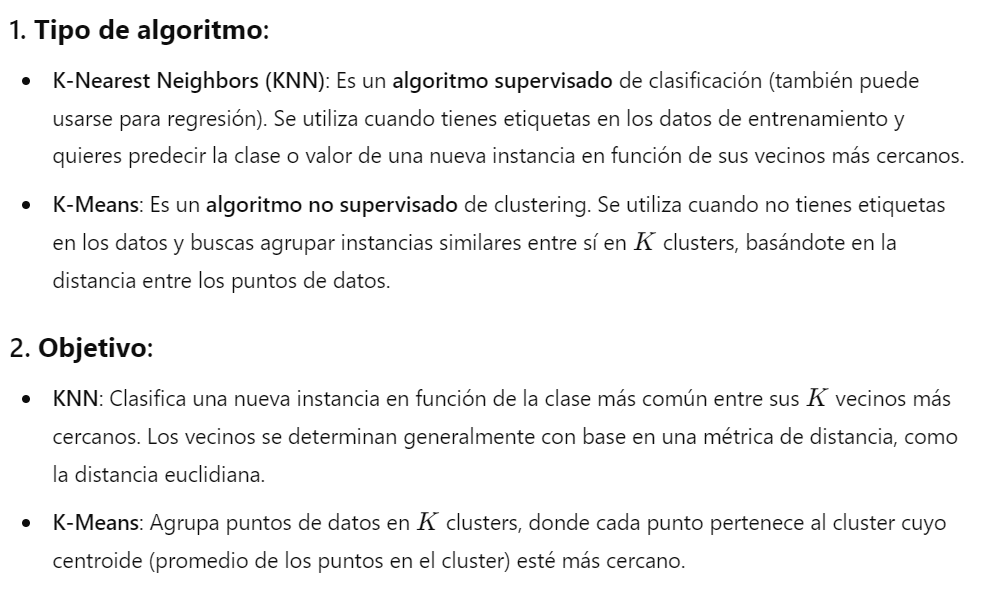

# 🤖 Algoritmo K-Nearest Neighbors (KNN) — Aprendizaje Supervisado

K-Nearest Neighbors (KNN) es un algoritmo de aprendizaje supervisado basado en instancias, utilizado tanto para clasificación como para regresión.

📍 Idea clave: KNN parte del supuesto de que los puntos de datos similares tienden a estar cerca unos de otros en el espacio de características.
👉 Es decir, “cosas parecidas están juntas”.

📌 Modelo Basado en Distancias
KNN no construye un modelo explícito durante el entrenamiento.

En su lugar, memoriza los datos y realiza predicciones basándose en la distancia entre el nuevo punto y los puntos de entrenamiento. Por eso se considera un modelo "lazy" (perezoso) o basado en memoria.

📚 ¿Qué aprenderemos en este notebook?
En este notebook abordaremos KNN paso a paso, cubriendo los siguientes temas:

1️⃣ El concepto básico del algoritmo KNN

2️⃣ Cómo funciona el algoritmo internamente

3️⃣ Cómo elegir un valor adecuado de K

4️⃣ Implementación básica de KNN en Python con Scikit-Learn





# Concepto Básico de KNN

📌 Concepto Básico de KNN (K-Nearest Neighbors)
KNN es un algoritmo de clasificación supervisado que asigna una clase a un nuevo punto según la mayoría de clases de sus vecinos más cercanos.

🧮 ¿Cómo funciona?
Se calcula la distancia del nuevo punto a todos los puntos del conjunto de entrenamiento.

Se seleccionan los K vecinos más cercanos.

Se asigna la clase más común entre esos vecinos al nuevo punto.

🎯 El parámetro K
Un valor pequeño de K (como 1 o 3) puede hacer que el modelo sea muy sensible al ruido.

Un valor muy grande puede provocar que se incluyan vecinos lejanos, lo que reduce la importancia de patrones locales.

🧠 Por ejemplo, si el conjunto tiene 1.000 muestras, usar K = 1000 significaría considerar todos los puntos, anulando así cualquier detección de estructuras locales.


# 📦 Importación de librerías necesarias

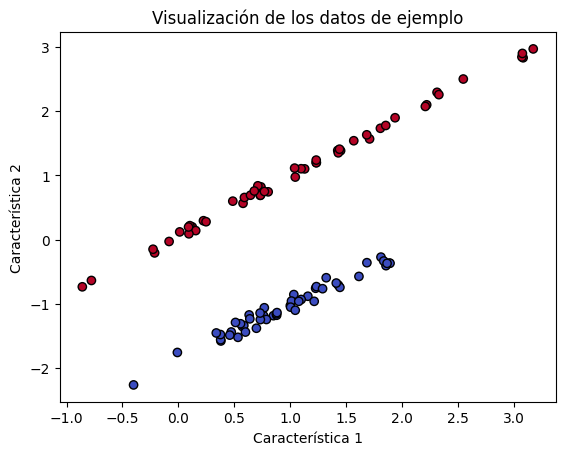

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification #herramienta útil para generar conjuntos de datos sintéticos para tareas de clasificación.
from sklearn.neighbors import KNeighborsClassifier

# Generar un conjunto de datos de ejemplo
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42) # crear dataset ficticios #si cargo el data puedo utilizar la misma funcion

#*n_informative=2, n_redundant=0  Ambas características son informativas. Sin embargo, en algunos casos puede haber redundancia entre ellas.
#El concepto de información redundante se utiliza en los árboles de decisión y en otros algoritmos de aprendizaje automático, donde puede ocurrir que dos features aporten información similar o innecesaria.
#Por ejemplo, si dos características describen de manera repetitiva lo mismo, como "alto" y "largo" en un objeto, esto no ayuda a mejorar la clasificación*.

# Crear un clasificador KNN
knn = KNeighborsClassifier(n_neighbors=3) #  clasificador considerará los 3 vecinos más cercanos al realizar la clasificación.

# Entrenar el clasificador
knn.fit(X, y)

# Graficar los puntos de datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
plt.title("Visualización de los datos de ejemplo")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()


###### Dos clases: Esto significa que el problema que estás resolviendo tiene dos posibles resultados o etiquetas (por ejemplo, Clase 1 y Clase 2, o rojo y azul en la gráfica).k=3: En cada predicción, el modelo examina los tres puntos más cercanos y clasifica el nuevo punto en la clase a la que pertenezca la mayoría de esos tres vecinos.

###### Funcionamiento de KNN

En el gráfico anterior, los puntos de datos se representan en un plano bidimensional. El color de cada punto indica su clase. Supongamos que queremos clasificar un nuevo punto que cae en alguna parte de este plano. El algoritmo KNN buscará los K vecinos más cercanos a este nuevo punto y tomará una decisión basada en la mayoría de las clases de esos vecinos.

A continuación, veremos cómo se clasifica un nuevo punto utilizando KNN.

# 🤖 Entrenamiento del modelo KNN

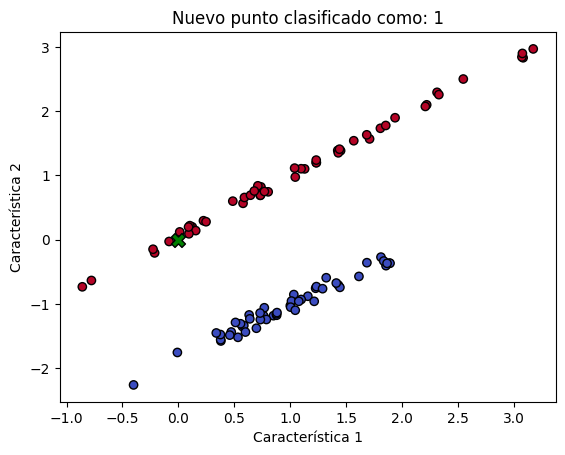

In [25]:
# Clasificar un nuevo punto
nuevo_punto = np.array([[0,0]]) # pos del nuevo punto , el se fiteo a los datos ( cambie el punto para que sea de la clase 0)
prediccion = knn.predict(nuevo_punto) # como el se fiteo al modelo knn.fit(X, y) ahora a que clase pertenece el nuevo punto
# Graficar el nuevo punto en el contexto de los datos existentes
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
plt.scatter(nuevo_punto[:, 0], nuevo_punto[:, 1], c='green', edgecolor='k', s=100, marker='X')
plt.title(f"Nuevo punto clasificado como: {prediccion[0]}") # nuevo punto y a que clase pertenece se baso en la distancia con los valores cercanos
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()


# Clasificación del Nuevo Punto

El punto verde marcado con una "X" representa un nuevo punto de datos que queremos clasificar. El algoritmo KNN busca los 3 vecinos más cercanos (ya que elegimos `K=3`) y clasifica el nuevo punto según la mayoría de sus vecinos.

En este ejemplo, el nuevo punto fue clasificado en la clase `1` (indicado por el color del punto verde).

# Implementación Básica de KNN en Python

A continuación, implementaremos KNN en un conjunto de datos más complejo utilizando la biblioteca Scikit-learn.

Precisión del modelo KNN: 1.00


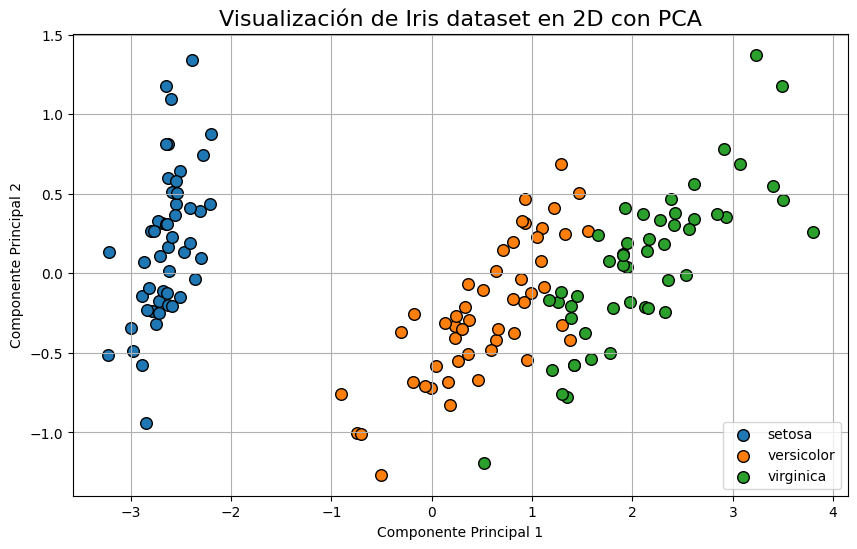

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# 1. Cargar el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target

# 2. Dividir el conjunto en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=4, p=2)
knn.fit(X_train, y_train)

# 4. Predecir en el conjunto de prueba
y_pred = knn.predict(X_test)

# 5. Evaluar la precisión
precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo KNN: {precision:.2f}")

# 6. Reducir dimensiones para visualizar (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 7. Visualizar
plt.figure(figsize=(10, 6))
for class_value in np.unique(y):
    plt.scatter(
        X_pca[y == class_value, 0],
        X_pca[y == class_value, 1],
        label=iris.target_names[class_value],
        edgecolor='k',
        s=70
    )

plt.title("Visualización de Iris dataset en 2D con PCA", fontsize=16)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.grid(True)
plt.show()


In [31]:
from sklearn.metrics import accuracy_score

# Predecir sobre el conjunto de prueba
y_pred = knn.predict(X_test)

# Calcular la precisión
precision = accuracy_score(y_test, y_pred)

# Mostrar la precisión
print(f"✅ Precisión del modelo KNN: {precision:.4f}")


✅ Precisión del modelo KNN: 1.0000


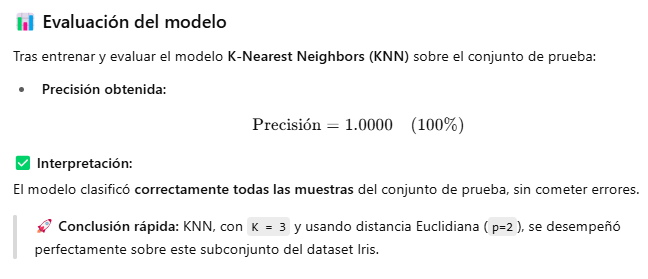


# ⚠️ Advertencia: ¿Qué significa obtener una precisión de 100%?

Aunque obtener una precisión del **100%** puede parecer ideal, es importante considerar algunos aspectos críticos:

- **Posible sobreajuste (overfitting):**  
  El modelo podría estar demasiado adaptado a los datos específicos, limitando su capacidad para generalizar a nuevos datos.

- **Facilidad del dataset:**  
  Algunos conjuntos de datos, como *Iris*, tienen clases bien separadas, facilitando la tarea de clasificación.

- **Tamaño reducido del conjunto de prueba:**  
  Una muestra pequeña puede dar lugar a resultados optimistas que no se mantienen en producción.

---

## 🎯 Buenas prácticas ante una precisión perfecta:

- **Aplicar validación cruzada (cross-validation)** para evaluar la estabilidad del modelo.
- **Probar diferentes valores de `K`** y observar si la precisión sigue siendo consistente.
- **Analizar otras métricas de desempeño**: matriz de confusión, precisión, recall, F1-score, especialmente si las clases están desbalanceadas.

---

> 🧠 **En resumen:**  
> Una precisión de 100% es un gran primer paso, pero debe analizarse con cuidado para validar que el modelo realmente generaliza bien.

---


###### Implementación Básica de KNN

En este ejemplo, utilizamos el conjunto de datos Iris, que es un clásico en machine learning. Dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba, entrenamos el modelo KNN con `K=3` y evaluamos su precisión en los datos de prueba.

**La precisión del modelo KNN en este caso fue de 1, lo que indica qué tan bien el modelo clasifica nuevas muestras basándose en sus vecinos más cercanos.**

###### Conclusión

El algoritmo KNN es fácil de entender e implementar, pero su rendimiento depende en gran medida de la elección de `K` y de cómo se maneja la escala de las características.

**Es especialmente útil en problemas donde la relación entre las características y la clase es compleja y no lineal.**

### **En general esta es una mala práctica es tomar un K sin evaluar el rendimiento del modelo**

**¿Por qué???**
## ⚠️ Limitaciones del modelo KNN inicial

Aunque el modelo KNN entrenado ha dado buenos resultados, existen dos **desventajas clave** en este enfoque inicial:

---

### 1️⃣ Uso del valor predeterminado de `K`

- El modelo utilizó el valor **por defecto de `K`**, ya que no lo especificamos manualmente.
- Este valor **no suele ser el óptimo** en la mayoría de los casos, y puede conducir a un rendimiento subóptimo.
- 👉 **Es fundamental encontrar el valor adecuado de `K`** mediante validación antes de definir el modelo final.

---

### 2️⃣ Evaluación basada en una sola partición de prueba

- El modelo fue evaluado usando una **única división del conjunto de datos** (por ejemplo, 70% entrenamiento y 30% prueba).
- Debido a la **aleatoriedad en la división** (`test_size=0.3`), la evaluación puede ser inestable:
  - Algunas clases pueden quedar **subrepresentadas** en el conjunto de prueba.
  - Cambiar la semilla aleatoria puede modificar significativamente los resultados.

---

## ✅ Solución: Validación cruzada de 5 pliegues (5-Fold Cross Validation)

Para obtener una evaluación más confiable del modelo, se recomienda usar **validación cruzada de 5 pliegues**, que consiste en:

1. Dividir el conjunto de datos en **5 partes iguales** (pliegues).
2. En cada iteración:
   - Usar **1 de los pliegues como conjunto de prueba**.
   - Usar los **4 restantes como conjunto de entrenamiento**.
3. Repetir este proceso **5 veces**, cambiando el pliegue de prueba en cada ocasión.
4. Calcular la **precisión promedio** sobre las 5 iteraciones.

---

> 🧠 **Ventaja clave:**  
> Este enfoque **reduce el sesgo** que puede generarse al depender de una sola partición aleatoria.  
> Además, permite una **mejor estimación del rendimiento real** del modelo en nuevos datos.





#¿Cómo Elegir el Valor de K?
Elegir el valor adecuado de `K` es crucial para el rendimiento del algoritmo. A continuación, veremos cómo varían los resultados al cambiar el valor de `K`.

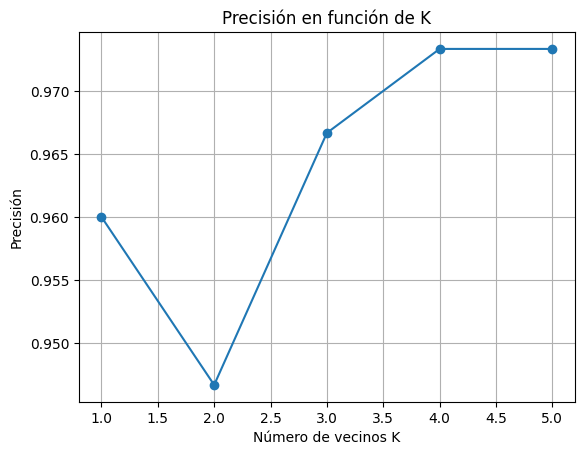

In [37]:
from sklearn.model_selection import cross_val_score

# Probar diferentes valores de K y calcular la precisión utilizando validación cruzada
k_values = list(range(1, 6)) # los mas freciuente
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k) # para cada calor de K haga un KNN k:1 k:2.. K:21
    scores = cross_val_score(knn, X, y, cv=5) # sacarle puntaje de la metrica con un dataset divido en 5 partes ( 1/5 con los otros 4/5 , luego el segundo 1/5 con los otros 4/5 que no seleccione 20.20.20..)
    accuracies.append(scores.mean()) # lista vacia y haga el promedio de puntajes 5 puntajes para cada K

# Graficar los resultados
plt.plot(k_values, accuracies, marker='o')
plt.title("Precisión en función de K")
plt.xlabel("Número de vecinos K")
plt.ylabel("Precisión")
plt.grid(True)
plt.show()


# Elección del Mejor Valor de K

En el gráfico anterior, vemos cómo varía la precisión del modelo en función del número de vecinos `K`. **El valor óptimo de `K` es aquel que maximiza la precisión sin causar un sobreajuste.**

En la práctica, puedes probar diferentes valores de `K` y utilizar validación cruzada para seleccionar el mejor valor.



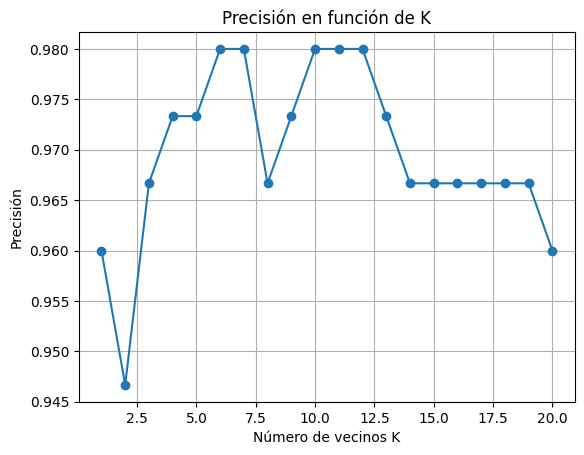

In [35]:
from sklearn.model_selection import cross_val_score

# Probar diferentes valores de K y calcular la precisión utilizando validación cruzada
k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    accuracies.append(scores.mean())

# Graficar los resultados
plt.plot(k_values, accuracies, marker='o')
plt.title("Precisión en función de K")
plt.xlabel("Número de vecinos K")
plt.ylabel("Precisión")
plt.grid(True)
plt.show()

### **¿Cuál es la métrica distancia más utilizada en KNN?**

LA DISTANCIA EUCLIDIANA

<div style="border: 1px solid ###ccc; padding: 10px; background-color: ###f9f9f9; border-radius: 5px; margin: 10px 0;">

**Nota Importante:**  
El mejor método para encontrar el valor correcto de **k** para KNN en un conjunto de datos dado es ejecutar KNN varias veces cambiando el valor de **k** y luego visualizar el rendimiento de la clasificación para diferentes valores de **k**. En lugar de usar solo un conjunto de prueba creado por división, aquí utilizamos validación cruzada de 5 pliegues (5-fold cross-validation) para mitigar la varianza que se produce debido a la aleatoriedad involucrada en la división de los datos usando Train Test split.

</div>

### MÉTODOS PARA ENCONTRAR EL MEJOR K-VALUE

###### 1) Iterar sobre una lista de K-values de 1 a 20 o 30

Text(0.5, 1.0, 'Efecto de cambiar el valor K')

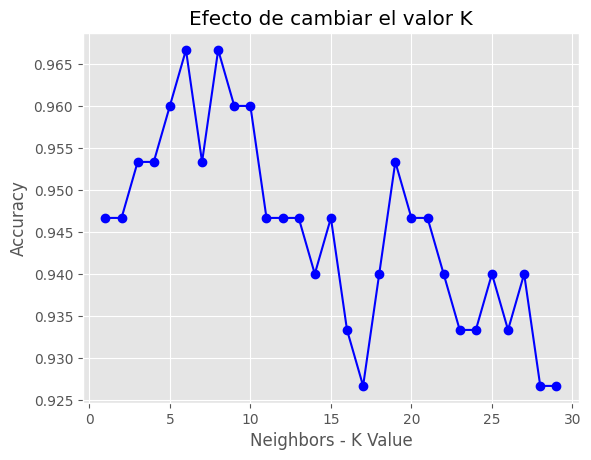

In [39]:
from sklearn.datasets import load_iris

X = load_iris().data
y = load_iris().target

from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # Estadísticamente es lo mismo que calcular el Z-Score  (restar la media y dividr entre la desviación estándar)
X_scaled = sc.fit_transform(X)

k_values = list(range(1, 30)) # From 1 to 30
acc_scores = []

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

for k in k_values:
  KNN = KNeighborsClassifier(n_neighbors=k)

  scores = cross_val_score(KNN, X_scaled, y,
                           scoring='accuracy', cv=5)

  acc_scores.append(np.mean(scores))

import matplotlib.pyplot as plt
plt.style.use("ggplot")

plt.plot(k_values, acc_scores, marker='o', color='blue')
plt.xlabel("Neighbors - K Value")
plt.ylabel("Accuracy")
plt.title("Efecto de cambiar el valor K")

<div style="border: 1px solid ###ccc; padding: 10px; background-color: ###f9f9f9; border-radius: 5px; margin: 10px 0;">

**Nota Importante:**

También es importante notar que solo necesitamos escalar las características de entrada (**X**), y no es necesario escalar la columna de etiquetas (**y**).

Luego, entrenamos el algoritmo KNN 30 veces con diferentes valores de **k** que van desde 1 hasta 30. Cada vez, evaluamos el rendimiento del modelo utilizando validación cruzada de 5 pliegues. Aquí, usamos la ‘precisión’ como la métrica de evaluación del modelo. Almacenamos la precisión cada vez y usamos esos datos para graficar la relación entre la puntuación de rendimiento y los valores de **k**.

</div>

###### 2) Método de redecilla o Grid search- PPT

In [ ]:
k_values = list(range(1, 10)) # From 1 to 30

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

hyperparameter_space = {'n_neighbors':k_values} # podria buscar la mejor P en el espacio de hiperparametros

from sklearn.model_selection import GridSearchCV # Validación cruzada con Busqueda en redecilla de la K ideal
gs = GridSearchCV(KNN, param_grid=hyperparameter_space,
                  scoring='accuracy', cv=5) #Este código hace una búsqueda de Redecilla o Grid Search

gs.fit(X_scaled, y)

print("Mejor valor de K: ", gs.best_params_)
print("Accuracy promedio del mejor valor para K: ", gs.best_score_)

Mejor valor de K:  {'n_neighbors': 6}
Accuracy promedio del mejor valor para K:  0.9666666666666668


¿Qué es la búsqueda en redecilla?
Es una técnica exhaustiva que evalúa todas las combinaciones posibles de un conjunto predefinido de hiperparámetros. A diferencia de otras técnicas más avanzadas, como la búsqueda aleatoria o la optimización bayesiana, la búsqueda en redecilla explora todas las combinaciones posibles de hiperparámetros de manera sistemática.

En resumen:

Define un conjunto de posibles valores para cada hiperparámetro.
Prueba todas las combinaciones posibles.
Selecciona la combinación que produce el mejor rendimiento del modelo (según alguna métrica como la precisión, F1-score, etc.).

https://medium.com/@senapati.dipak97/grid-search-vs-random-search-d34c92946318

###### 3) Método de visualizar las curvas de error para data al graficar el accuracy del modelo con Data de entrenamiento vs Data test (De tipo cross validation)

<Axes: title={'center': 'Validation Curve for KNeighborsClassifier'}, xlabel='n_neighbors', ylabel='score'>

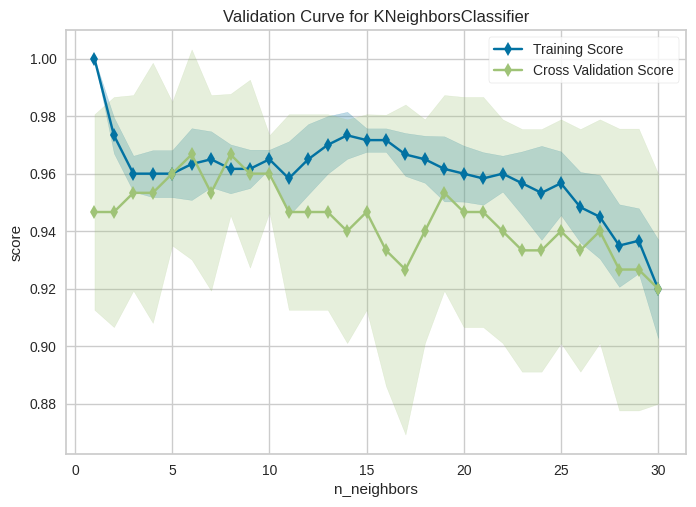

In [40]:
# Importing Yellowbrick's validation curve visualizer
from yellowbrick.model_selection import ValidationCurve

# Importing KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Range of neighbor values from 1 to 30
k_values = list(range(1, 31))

# Creating the validation curve
viz = ValidationCurve(KNeighborsClassifier(),
                      param_name="n_neighbors",  # Use the correct parameter name for KNN
                      param_range=k_values,
                      cv=5, scoring="accuracy")  # 5-fold cross-validation

# Fit the model with the scaled data
viz.fit(X_scaled, y)

# Display and save the plot
viz.show(outpath="Curva_validación.png")


**El valor ideal de K parece estar entre 6 y 8 dónde el acurracy es similar (el modelo va a generalizar bien con data que no conce), luego vemos como el accuracy va cayendo al aumentar el número de vecinos cercanos, con una zona entre 12 y 15 vecinos cercanos dónde parece haber overfitting**, luego tiene tantos vecinos cernanos que no alanza a difereciar es posible tener un
underfitting.

######¿CUAL SERIA EL IDEAL?

###### 4)Trazado de las fronteras de decisión para diferentes valores de k

En KNN, las fronteras de decisión definen las regiones de las etiquetas de clase asignadas a un punto de datos en función de la clase mayoritaria del valor de **k**.

Aquí, veremos cómo cambian las fronteras de decisión con diferentes valores de **k**. Trazar manualmente las fronteras de decisión es una tarea que consume mucho tiempo y requiere muchas líneas de código. Por lo tanto, utilizamos la función `plot_decision_regions()` de la biblioteca **mlxtend** (extensiones de machine learning) de Python.

In [41]:
pip install mlxtend # Hace un reset , es mejor dejarla para cargarla siempre que la use

**Esta función crea gráficos en 2D. Por lo tanto, necesitamos proporcionar datos de entrada en 2 dimensiones. Si los datos están en una forma de dimensionalidad superior, necesitamos aplicar PCA para reducir la dimensionalidad a dos.**  ( el numero de caracteristicas es equivalente al numero de dimensiones )

In [42]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [45]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

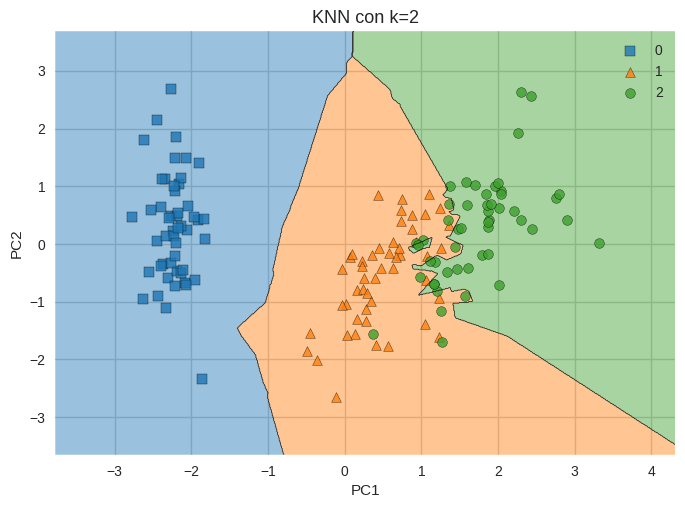

In [43]:
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Realizar PCA con 2 componentes para hacer visualizaciones en 2D,
# cuando el número de características es > 2
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # recuerde que dos componentes principales tiene el 95% de la varianza del dataset
X_pca = pca.fit_transform(X_scaled)  # Retener el 95% de la varianza
                                     # en los datos de Iris


def knn_decision_boundaries(data, y, k):
    KNN = KNeighborsClassifier(n_neighbors=k) # hago un Knn
    KNN.fit(data, y) # lo adapto a los datos


    plot_decision_regions(data, y, clf=KNN)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("KNN con k=" + str(k), fontsize=13)
    plt.savefig('ABC.png', dpi=80) #se utiliza para guardar la figura generada como un archivo de imagen.

knn_decision_boundaries(X_pca, y, 2) # cambie el valor de 20




K bajo dos vecinos cercanos , K mas rudo, la linea es mas rugosa . Las fronteras son mas dificiles .

Una zona es difícil para el algoritmo porque los datos están muy juntos; es decir, estas dos clases de flores son muy parecidas entre sí. Cuando utilizo pocos vecinos cercanos, por ejemplo, dos, los bordes de decisión que genera el algoritmo son más irregulares o 'rugosos'. Esto se debe a que cada punto toma en cuenta solo a dos vecinos cercanos para clasificar.


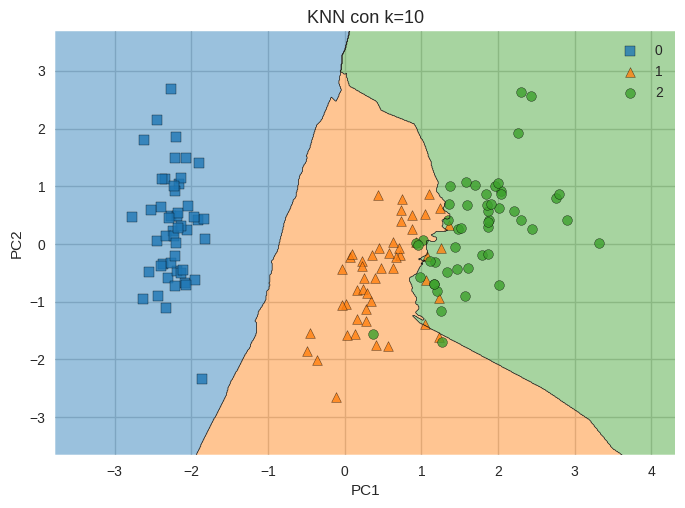

In [46]:
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Realizar PCA con 2 componentes para hacer visualizaciones en 2D,
# cuando el número de características es > 2
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # recuerde que dos componentes principales tiene el 95% de la varianza del dataset
X_pca = pca.fit_transform(X_scaled)  # Retener el 95% de la varianza
                                     # en los datos de Iris


def knn_decision_boundaries(data, y, k):
    KNN = KNeighborsClassifier(n_neighbors=k) # hago un Knn
    KNN.fit(data, y) # lo adapto a los datos


    plot_decision_regions(data, y, clf=KNN)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("KNN con k=" + str(k), fontsize=13)
    plt.savefig('ABC.png', dpi=80) #se utiliza para guardar la figura generada como un archivo de imagen.

knn_decision_boundaries(X_pca, y, 10) # cambie el valor de 20


Sin embargo, cuando aumento el número de vecinos cercanos considerados, el modelo empieza a tomar en cuenta más datos. En consecuencia, la línea de decisión se vuelve menos abrupta, es decir, más suave. Esto sucede porque las fronteras de decisión se suavizan al tener más información sobre los puntos vecinos, lo que permite separar mejor estas clases de flores.

En este experimento, utilicé solo dos vecinos, lo que generó una frontera más rígida. Pero en otro experimento, pasé a considerar 20 vecinos, lo cual me permitió obtener una mejor separación, ya que este número de vecinos es más adecuado para estos datos."

# Ideal

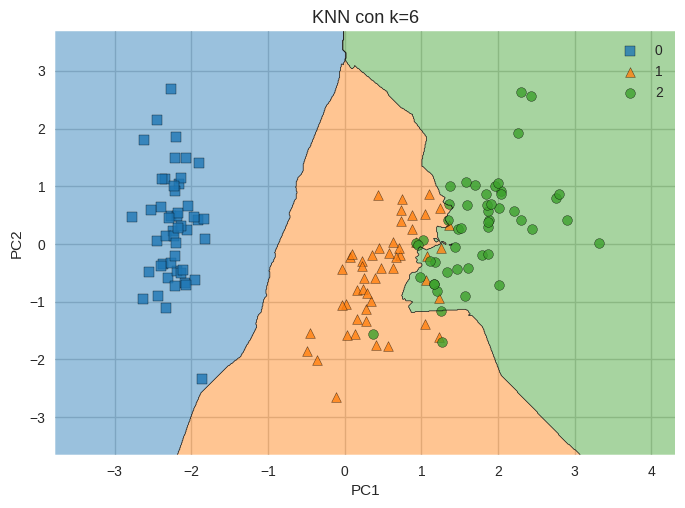

In [47]:
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Realizar PCA con 2 componentes para hacer visualizaciones en 2D,
# cuando el número de características es > 2
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # Retener el 95% de la varianza
                                     # en los datos de Iris


def knn_decision_boundaries(data, y, k):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(data, y)

    plot_decision_regions(data, y, clf=KNN)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("KNN con k=" + str(k), fontsize=13)
    plt.savefig('ABC.png', dpi=80)

knn_decision_boundaries(X_pca, y, 6)


"Valores pequeños de k tienden a crear fronteras de decisión más complejas, pero minimizan la cantidad de puntos de datos clasificados incorrectamente."

######### DATASET MUY SENCILLO, : con uno más complejo CANCER DE MAMA

In [50]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Cargar el conjunto de datos de cáncer de mama
data = load_breast_cancer()
X = data.data  # Características
y = data.target  # Etiquetas

# Crear un DataFrame para explorar los datos
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Mostrar las primeras filas del conjunto de datos
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [60]:
df.shape



(569, 31)

###### 2. Preprocesamiento de los Datos

**El algoritmo KNN es sensible a la escala de las características.Por medir distancias cm a m** ==> buen práctica es Estandarizar usando Z-score o StandardScaler(), en general una buena practica es estandarizar

Por lo tanto, es importante estandarizar las características para que tengan media 0 y varianza 1. **Esto asegurará que todas las características contribuyan igualmente a la distancia calculada.**

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)



Otra buena practica

## OneHotEncoding ==> Binarizar variables categóricas.

## Label Encoding ==> asignar número por categoría (6 categorías) => label encoder por ejemplo del 0 al 5 algunos modelos permiten esta forma de numerizar variables categoricas

##El catBoost es como un XGBOOST que acepta varibles categoricas el me ahorra ese paso pero realmente lo hace , no es que las acepte las numeriza por defecto

###### 3. Entrenar el Modelo KNN, vamos a utilizar un clasificador

Ahora, entrenemos un modelo KNN con un valor inicial de K=5. Más adelante, probaremos diferentes valores de K para encontrar el óptimo.

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Crear un clasificador KNN con K=5
knn = KNeighborsClassifier(n_neighbors=5) # 180

# Entrenar el clasificador
knn.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))
print(f"Precisión del modelo KNN: {accuracy_score(y_test, y_pred):.2f}")


Matriz de Confusión:
[[ 59   4]
 [  3 105]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Precisión del modelo KNN: 0.96


###### 4. Optimizar el Valor de K

El rendimiento del algoritmo KNN depende del valor de K. Vamos a probar diferentes valores de K y calcular la precisión para cada uno de ellos utilizando validación cruzada.

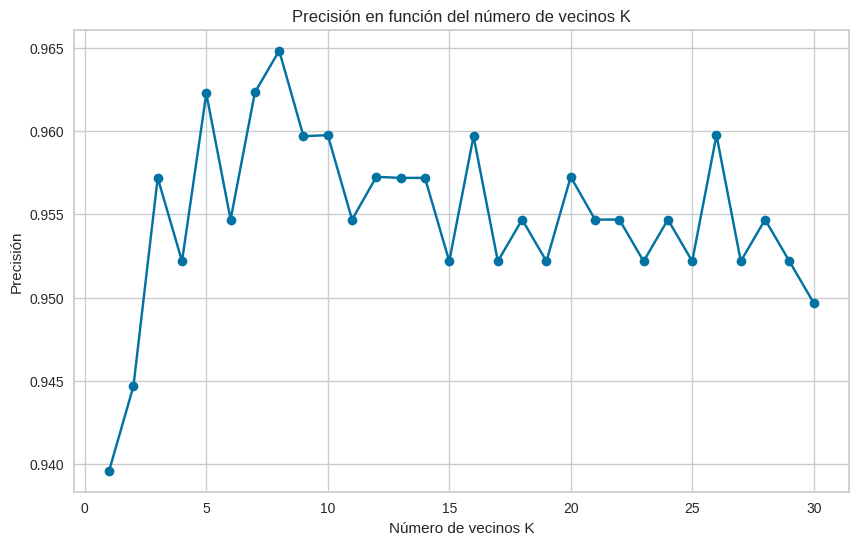

In [61]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Probar diferentes valores de K
k_values = list(range(1, 31)) # 180
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    accuracies.append(scores.mean())

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title("Precisión en función del número de vecinos K")
plt.xlabel("Número de vecinos K")
plt.ylabel("Precisión")
plt.grid(True)
plt.show()


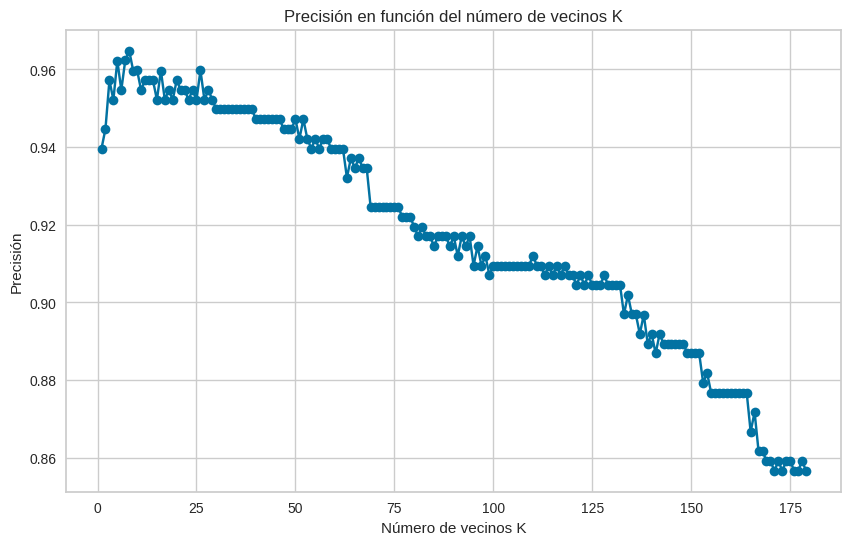

In [62]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Probar diferentes valores de K
k_values = list(range(1, 180))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    accuracies.append(scores.mean())

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title("Precisión en función del número de vecinos K")
plt.xlabel("Número de vecinos K")
plt.ylabel("Precisión")
plt.grid(True)
plt.show()

" la resolución de esta gráfica ajustando el número de vecinos K. En síntesis, el algoritmo K-Nearest Neighbors (KNN) es útil tanto para tareas de clasificación como de regresión. Funciona de manera estándar utilizando la distancia euclidiana, evaluando los vecinos más cercanos para hacer predicciones, ya sean numéricas o categóricas. Este algoritmo puede ajustarse mediante validación cruzada, variando el número de vecinos (K) o modificando la métrica de distancia según las necesidades específicas.

El valor de K es importante; aunque K es útil, al utilizarlo, se debe tener en cuenta que KNN es un algoritmo supervisado. Sin embargo, cuando no tenemos etiquetas, podemos utilizar técnicas de clustering no supervisado que evalúan distancias promedio entre vecinos o similares. Así que, la clave está en identificar si un conjunto de datos necesita un enfoque supervisado o no supervisado.

# 📌 Aplicaciones más Fuertes de KNN (K-Nearest Neighbors)

KNN es un algoritmo simple pero poderoso que se aplica en numerosos campos, especialmente cuando no hay una relación lineal clara entre las variables y se busca una solución interpretable.

---

## 🔍 1. Sistemas de Recomendación
- **Descripción:** Recomendación de productos, películas, música, etc.
- **Cómo funciona:** Busca usuarios similares y recomienda elementos que ellos prefieren.
- **Ejemplo real:** Netflix, Amazon, Spotify.

---

## 🧬 2. Clasificación de Imágenes y Reconocimiento Facial
- **Descripción:** Clasificación de imágenes en categorías como "perro", "gato", etc.
- **Cómo funciona:** Se comparan características extraídas (por ejemplo, PCA o CNN) con ejemplos conocidos.
- **Ejemplo real:** Reconocimiento de dígitos manuscritos (MNIST), etiquetado de rostros.

---

## 🏥 3. Diagnóstico Médico
- **Descripción:** Apoyo en diagnósticos médicos basados en síntomas o pruebas clínicas.
- **Cómo funciona:** Compara con pacientes anteriores para inferir enfermedades.
- **Ejemplo real:** Predicción de enfermedades cardíacas, diabetes, cáncer de mama (datasets de UCI).

---

## 🛂 4. Detección de Fraudes e Intrusos
- **Descripción:** Identificación de actividades anómalas o maliciosas.
- **Cómo funciona:** Transacciones o accesos se comparan con un historial normal.
- **Ejemplo real:** Fraude en tarjetas de crédito, ciberseguridad.

---

## 🔡 5. Reconocimiento de Texto (OCR)
- **Descripción:** Lectura automática de texto en imágenes.
- **Cómo funciona:** Compara patrones de letras vectorizadas con un dataset entrenado.
- **Ejemplo real:** OCR en documentos escaneados o captchas.

---

## 🏷️ 6. Clasificación de Documentos y Análisis de Sentimientos
- **Descripción:** Clasificación de opiniones o temas en textos.
- **Cómo funciona:** Vectoriza el texto (TF-IDF, embeddings) y compara con vecinos.
- **Ejemplo real:** Opiniones en Amazon, comentarios en redes sociales.

---

## 🧭 7. Sistemas de Navegación y Geolocalización
- **Descripción:** Estimación de ubicación basada en señales WiFi o GPS.
- **Cómo funciona:** Se compara con señales registradas en ubicaciones conocidas.
- **Ejemplo real:** Localización en interiores, mapas inteligentes.

---

## ⚠️ Limitaciones del KNN
- ❌ Escalabilidad limitada (lento con muchos datos).
- ❌ Sensible al ruido y a variables irrelevantes.
- ❌ Requiere buen preprocesamiento (normalización, selección de características).

---

> ¿Deseas que te genere un ejemplo práctico de alguna de estas aplicaciones en Python?
